In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
df = pd.read_csv('Training data file.csv', index_col='Customer_No')
df_test = pd.read_csv('Validation Data file.csv', index_col='Customer_No')
df1 = df.copy()
col = df.columns

In [3]:
def missingdata_percentage(df, per=0):
    missing = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            count = df[col].isna().sum()
            percentage = 100*df[col].isna().sum()/df.shape[0]
            if percentage>=per:
              missing = missing.append({'category' : col, 'percentage' : percentage, 'count' : int(count)}, ignore_index=True)
    missing.sort_values(by=['percentage'], inplace=True, ascending=False)
    return missing

In [4]:
missingdata_percentage(df), missingdata_percentage(df_test)

(                   category  percentage    count
 3               CoAp_Income   94.931879  77135.0
 1  Max_Ratio_OC_Pending_POS   89.407160  72646.0
 6        Total_Field_Trails   67.335360  54712.0
 7            Total_Resolved   61.911560  50305.0
 5    Perc_Paymode_Cheq_Fail   28.893702  23477.0
 0  Max_Perc_Def_Chg_Pending   25.941196  21078.0
 2              N_PosBkt_L3m    6.569604   5338.0
 8   Max_Loan_Balance_Others    0.419677    341.0
 4               Max_DPD_L3m    0.299066    243.0,
                    category  percentage    count
 3               CoAp_Income   95.060045  28576.0
 1  Max_Ratio_OC_Pending_POS   89.551246  26920.0
 6        Total_Field_Trails   67.619174  20327.0
 7            Total_Resolved   62.117029  18673.0
 5    Perc_Paymode_Cheq_Fail   28.638435   8609.0
 0  Max_Perc_Def_Chg_Pending   24.513489   7369.0
 2              N_PosBkt_L3m    6.157480   1851.0
 4               Max_DPD_L3m    0.392535    118.0
 8   Max_Loan_Balance_Others    0.372576    112.0

In [5]:
col

Index(['N_Default_L3m', 'Branch_Code', 'Max_Utilization',
       'Max_Perc_Def_Chg_Pending', 'N_Family_Member',
       'Max_Ratio_OC_Pending_POS', 'N_PosBkt_L3m', 'CoAp_Income',
       'Ever_Default_L12M', 'Perc_Paymode_Online', 'Perc_Repay_Fail',
       'Birth_Year', 'Max_DPD_L3m', 'Perc_Paymode_Cheq_Fail', 'Age',
       'Total_Field_Trails', 'Total_Resolved', 'N_Enq_L9m',
       'Max_Loan_Balance_Others', 'N_WorkEx_Yr', 'Target_Flag'],
      dtype='object')

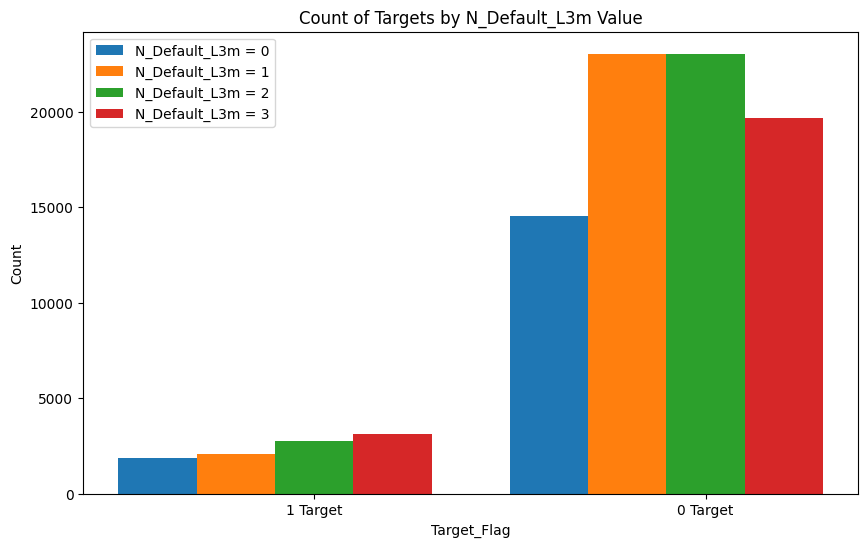

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame for each value of 'N_Default_L3m' and count '1' and '0' in 'Target_Flag'
count_1_target = df[df['N_Default_L3m'] == 1]['Target_Flag'].value_counts()
count_0_target = df[df['N_Default_L3m'] == 0]['Target_Flag'].value_counts()
count_3_target = df[df['N_Default_L3m'] == 3]['Target_Flag'].value_counts()
count_2_target = df[df['N_Default_L3m'] == 2]['Target_Flag'].value_counts()

# Create an array for x-axis positions
x = np.arange(len(count_1_target))

# Define bar width
bar_width = 0.2

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create grouped bar plots
plt.bar(x - 2*bar_width, [count_0_target.get(1, 0), count_1_target.get(0, 0)], width=bar_width, label='N_Default_L3m = 0')
plt.bar(x - bar_width, [count_1_target.get(1, 0), count_0_target.get(0, 0)], width=bar_width, label='N_Default_L3m = 1')
plt.bar(x , [count_2_target.get(1, 0), count_0_target.get(0, 0)], width=bar_width, label='N_Default_L3m = 2')
plt.bar(x + bar_width, [count_3_target.get(1, 0), count_3_target.get(0, 0)], width=bar_width, label='N_Default_L3m = 3')

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(['1 Target', '0 Target'])

# Labeling and legend
plt.xlabel('Target_Flag')
plt.ylabel('Count')
plt.title('Count of Targets by N_Default_L3m Value')
plt.legend()

plt.show()


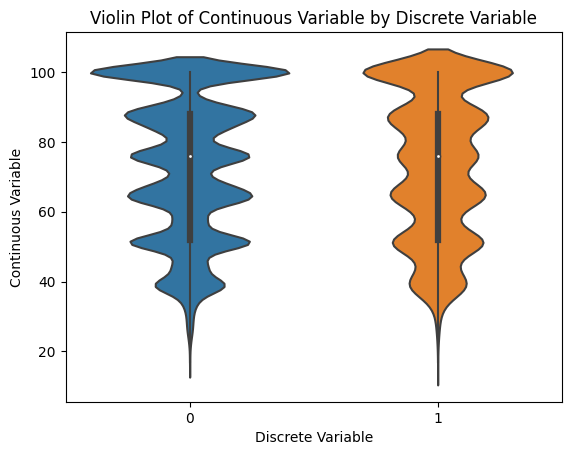

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data: 'discrete_var' is categorical, and 'continuous_var' is continuous
sns.violinplot(x='Target_Flag', y='Max_Utilization', data=df)
plt.xlabel('Discrete Variable')
plt.ylabel('Continuous Variable')
plt.title('Violin Plot of Continuous Variable by Discrete Variable')
plt.show()


In [50]:
df[df['Max_Utilization'] < 95]['Target_Flag'].value_counts()

0    56962
1     7544
Name: Target_Flag, dtype: int64

In [43]:
df[df['Max_Utilization'] > 95]['Target_Flag'].value_counts()


0    14488
1     2239
Name: Target_Flag, dtype: int64

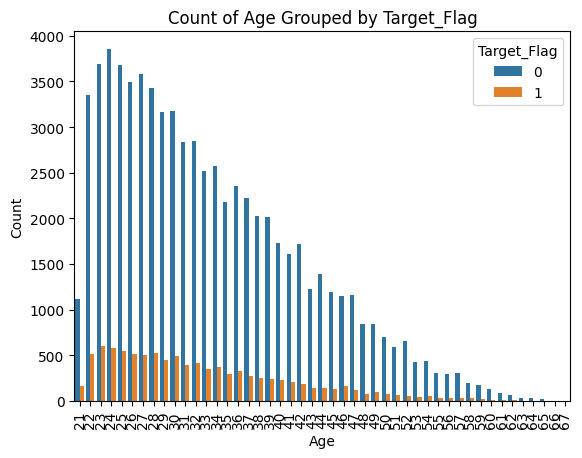

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data: Replace 'df' and 'Age' with your actual DataFrame and column name
sns.countplot(x='Age', hue='Target_Flag', data=df)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Age Grouped by Target_Flag')
plt.legend(title='Target_Flag', labels=['0', '1'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

age_counts = df['Age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Total_Count']

# Calculate the count of 'Target_Flag' = 1 in each age group
flag_counts = df[df['Target_Flag'] == 1]['Age'].value_counts().reset_index()
flag_counts.columns = ['Age', 'Flag_Count']

# Merge the two DataFrames and calculate the ratio
merged_df = pd.merge(age_counts, flag_counts, on='Age', how='left')
merged_df['Ratio'] = merged_df['Flag_Count'] / merged_df['Total_Count']

# Sort the DataFrame by the ratio in ascending order
merged_df.sort_values(by=['Ratio'], inplace=True, ascending=False)

merged_df

# Create the count plot


,Age,Total_Count,Flag_Count,Ratio
45,66,7,2.0,0.285714
1,23,4291,598.0,0.139361
7,30,3665,491.0,0.133970
37,58,224,30.0,0.133929
5,28,3945,521.0,0.132066
6,22,3862,509.0,0.131797
0,24,4438,583.0,0.131365
2,25,4224,545.0,0.129025
25,21,1281,165.0,0.128806
4,26,4009,514.0,0.128212


<Axes: xlabel='Age'>

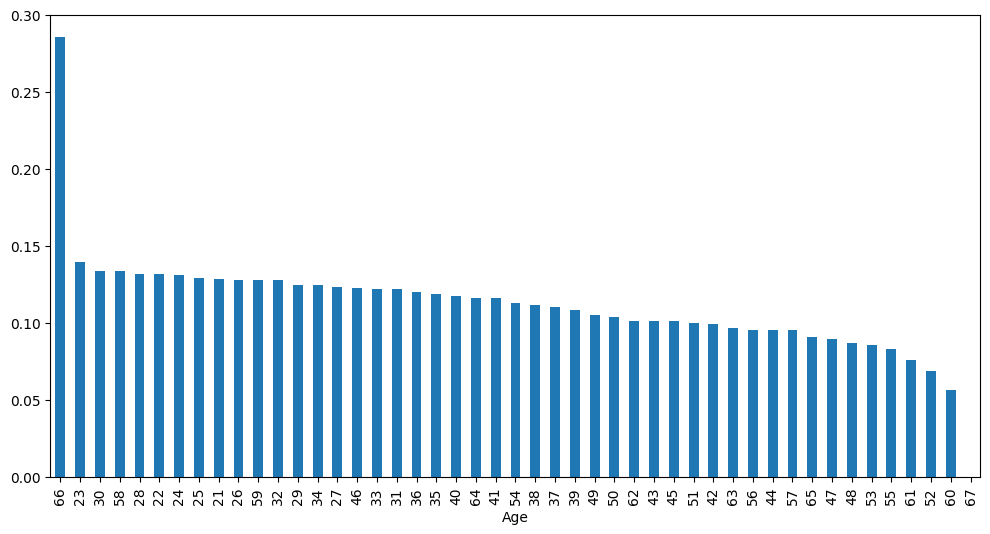

In [40]:

merged_df['Ratio'].plot(kind='bar',figsize=(12, 6))

Age 66 could be considered an outlier because from the above graph most of the aged customers have pretty low ratio so it might mislead the data.|